In [7]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_columns', None)  # 显示所有列
file_path = '../depth/1_table_#.csv'
df = pd.read_csv(file_path)

# # df = df.drop(columns=['pbid'])
# df = df[df['depth'] >= 20]
# df = df[(df['num_params'] >= 1)]
grouped_df = df.groupby(['pkid','method'], as_index=False).mean()
grouped_df = grouped_df[grouped_df['pkid']%4 == 0]
grouped_df['pksid'] = grouped_df['pkid']//4
grouped_df['layer_depth'] = grouped_df['depth'] / grouped_df['layers']

In [8]:
## noise data
file_path = 'ibm_kyiv.csv'
df = pd.read_csv(file_path)

# # df = df.drop(columns=['pbid'])
# df = df[df['depth'] >= 20]
# df = df[(df['num_params'] >= 1)]
kyiv_df = df.groupby(['pksid','pkid','method'], as_index=False).mean()
kyiv_df = kyiv_df.merge(grouped_df[['pksid','method','layer_depth']], on=['pksid','method'])
kyiv_df['quantum'] = kyiv_df['layer_depth'] * kyiv_df['run_times'] *  kyiv_df['layers'] 
kyiv_df

,pksid,pkid,method,pbid,layers,variables,constraints,best_solution_probs,in_constraints_probs,ARG,iteration_count,classcial,quantum,run_times,layer_depth
0,0,0,ChocoSolver,1.5,1.0,6.0,3.0,8.398438,17.968750,36.006128,15.750,0.614027,921523.200,9088.0,101.400
1,0,0,HeaSolver,1.5,5.0,6.0,3.0,1.416016,6.005859,58.309534,31.000,1.327496,800768.000,17408.0,9.200
2,0,0,PenaltySolver,1.5,5.0,6.0,3.0,1.367188,6.298828,55.609370,31.000,1.288463,1514496.000,17408.0,17.400
3,0,0,QtoSimplifyDiscardSolver,1.5,5.0,6.0,3.0,5.029297,13.867188,31.453340,15.750,0.734752,926976.000,9088.0,20.400
4,1,0,ChocoSolver,1.5,1.0,8.0,6.0,0.830078,2.026367,163.910878,15.625,4.064610,3390587.520,9024.0,375.730
5,1,0,HeaSolver,1.5,5.0,8.0,6.0,0.512695,1.904297,162.306356,31.000,8.478087,1323008.000,17408.0,15.200
6,1,0,PenaltySolver,1.5,5.0,8.0,6.0,0.561523,1.879883,165.519216,31.000,8.702243,4510064.640,17408.0,51.816
7,1,0,QtoSimplifyDiscardSolver,1.5,5.0,8.0,6.0,1.757812,4.907227,106.420209,23.125,5.336560,5961728.000,13120.0,90.880
8,2,0,ChocoSolver,1.5,1.0,7.0,4.0,2.050781,4.858398,60.454270,15.625,1.805399,2388905.472,9024.0,264.728
9,2,0,HeaSolver,1.5,5.0,7.0,4.0,1.660156,4.077148,60.968399,31.000,3.527107,974848.000,17408.0,11.200


In [10]:
file_path = 'ibm_brisbane.csv'
df = pd.read_csv(file_path)

brisbane_df = df.groupby(['pksid','pkid','method'], as_index=False).mean()
brisbane_df = brisbane_df.merge(grouped_df[['pksid','method','layer_depth']], on=['pksid','method'])
brisbane_df['quantum'] = brisbane_df['layer_depth'] * brisbane_df['run_times']*  kyiv_df['layers'] 
brisbane_df

,pksid,pkid,method,pbid,layers,variables,constraints,best_solution_probs,in_constraints_probs,ARG,iteration_count,classcial,quantum,run_times,layer_depth
0,0,0,ChocoSolver,1.5,1.0,6.0,3.0,7.714844,16.357422,34.259372,15.50,0.584210,908544.000,8960.0,101.400
1,0,0,HeaSolver,1.5,5.0,6.0,3.0,1.416016,5.273438,58.893969,31.00,1.210410,800768.000,17408.0,9.200
2,0,0,PenaltySolver,1.5,5.0,6.0,3.0,1.220703,7.080078,55.544498,31.00,1.377114,1514496.000,17408.0,17.400
3,0,0,QtoSimplifyDiscardSolver,1.5,5.0,6.0,3.0,4.003906,12.890625,36.056503,15.75,0.776262,926976.000,9088.0,20.400
4,1,0,ChocoSolver,1.5,1.0,8.0,6.0,0.537109,1.806641,162.773459,15.75,3.999751,3414634.240,9088.0,375.730
5,1,0,HeaSolver,1.5,5.0,8.0,6.0,0.195312,1.074219,170.474840,31.00,8.353920,1323008.000,17408.0,15.200
6,1,0,PenaltySolver,1.5,5.0,8.0,6.0,0.585938,1.757812,160.025276,31.00,8.388428,4510064.640,17408.0,51.816
7,1,0,QtoSimplifyDiscardSolver,1.5,5.0,8.0,6.0,3.222656,7.373047,104.362249,23.00,5.273802,5932646.400,13056.0,90.880
8,2,0,ChocoSolver,1.5,1.0,7.0,4.0,2.880859,6.298828,56.124271,15.25,1.469008,2338077.696,8832.0,264.728
9,2,0,HeaSolver,1.5,5.0,7.0,4.0,2.587891,4.199219,62.288906,31.00,3.142005,974848.000,17408.0,11.200


1032874.6666666666
3020810.2399999998
2233672.064
4201625.599999999
1032874.6666666666
3020810.2399999998
2220418.6453333334
4191931.733333333


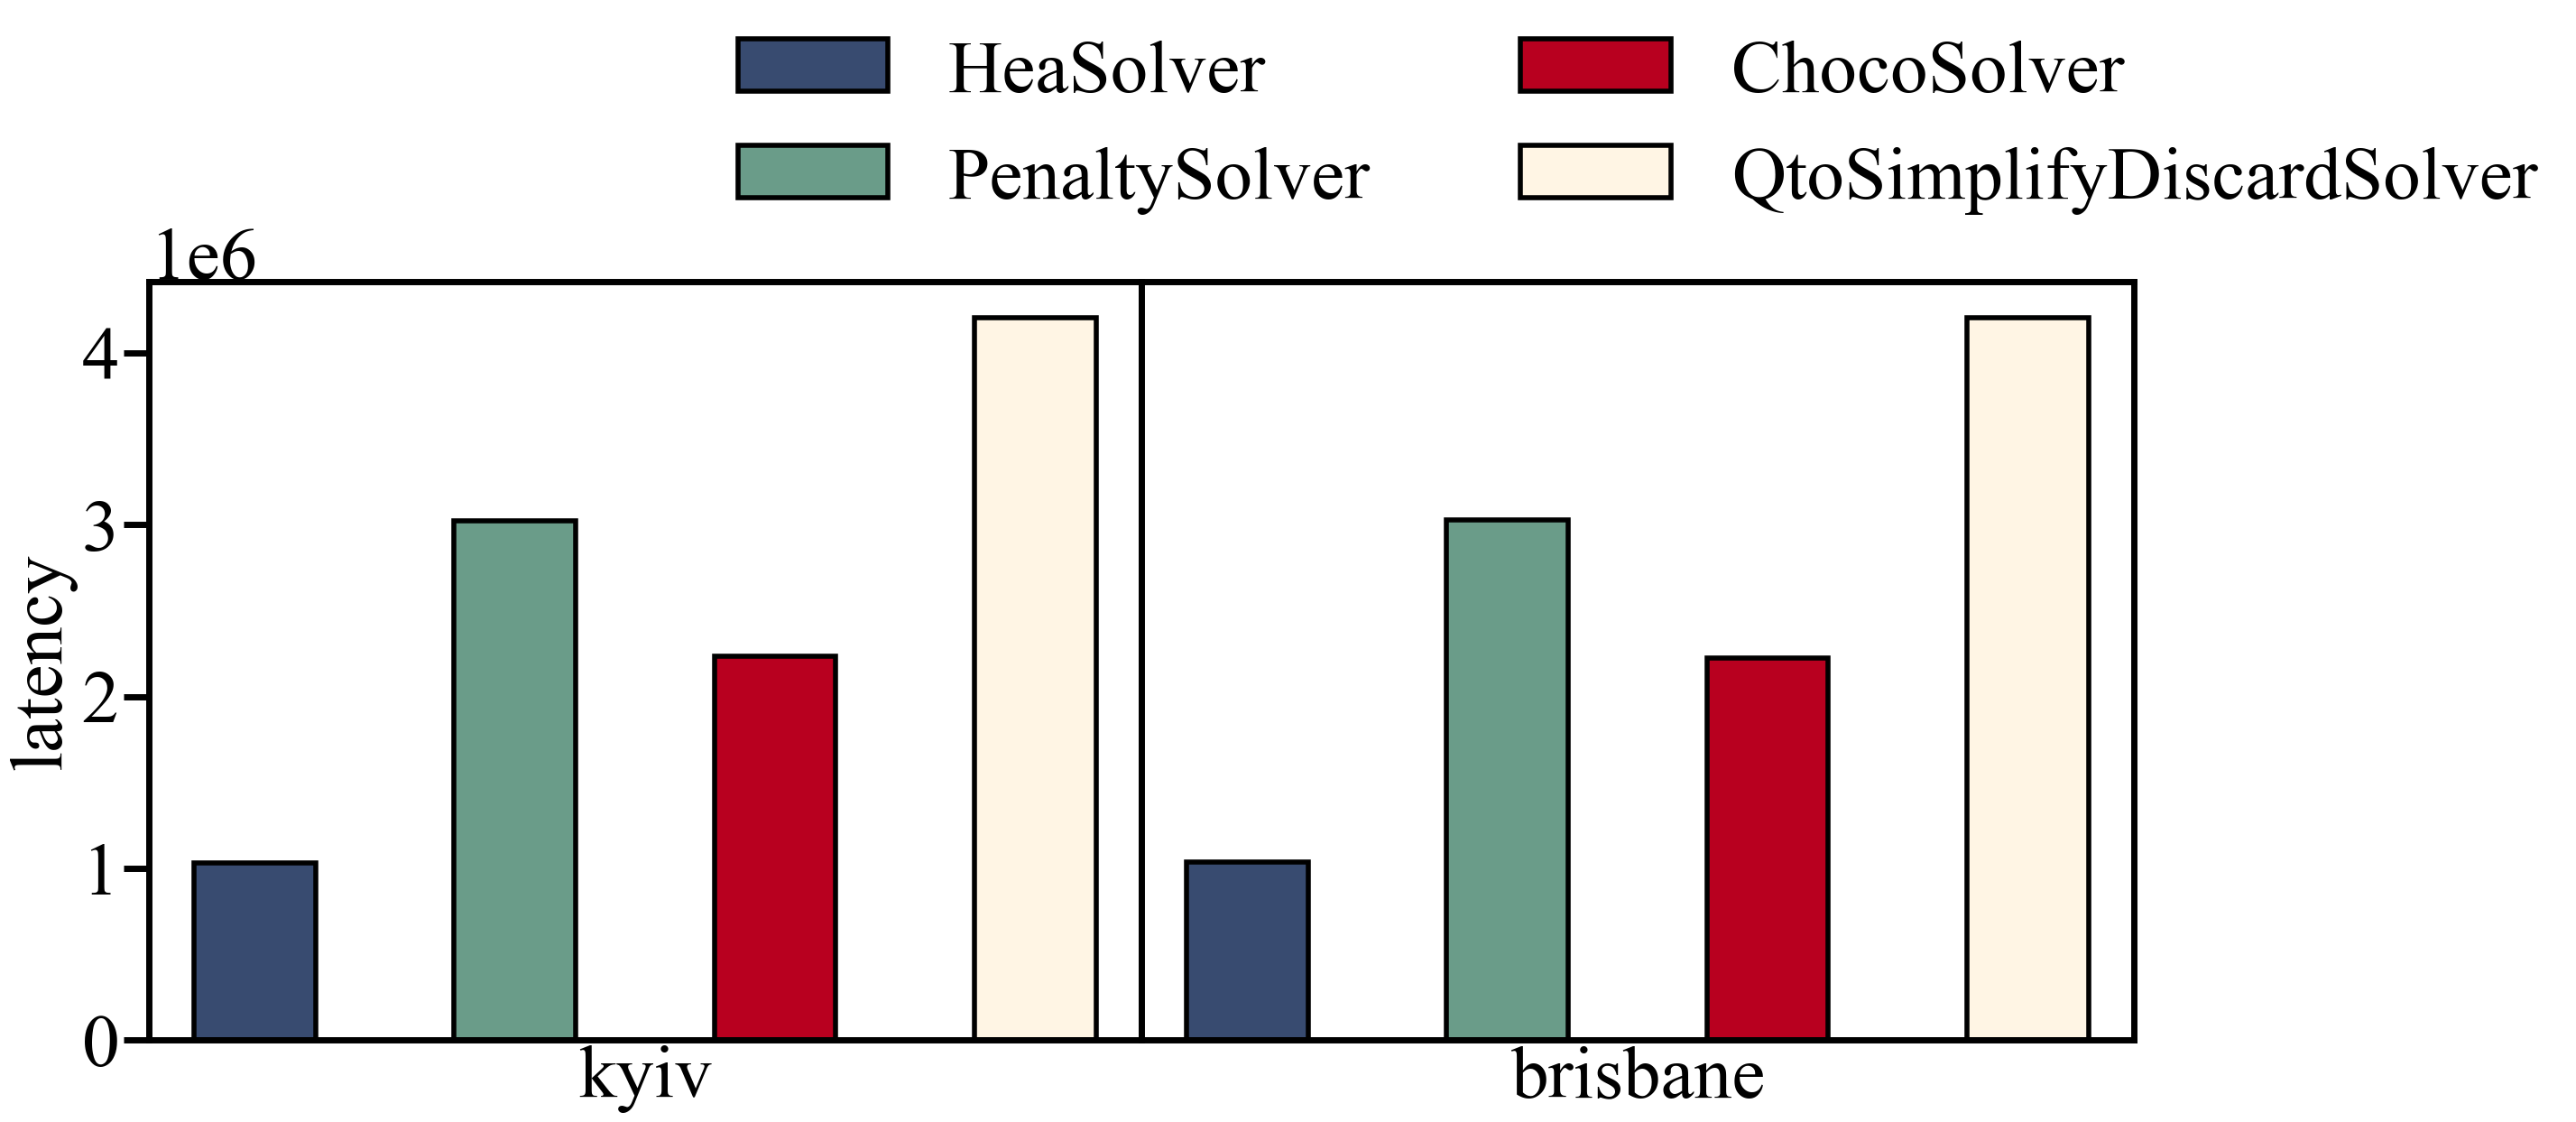

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
scale = 1
fig = plt.figure(figsize=(22*scale, 12*scale))
mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 60,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 5,
    'xtick.major.size': 20,
    'xtick.major.width': 5,
    'xtick.minor.size': 10,
    'xtick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    "lines.markersize" : 35,
    "lines.markeredgewidth" : 4,
    "markers.fillstyle" :  'full',
    'lines.markerfacecolor': '#f8d941',
    'lines.markeredgecolor': 'black',
})
# 定义方法和设备
methods = ['HeaSolver', 'PenaltySolver', 'ChocoSolver', 'QtoSimplifyDiscardSolver']
locations = ['kyiv', 'brisbane']  # 分类依据：location
device_df = [kyiv_df, brisbane_df]

# 设置颜色和柱宽
move = 0.15  # 用于计算位置偏移
visible_bar_width = 0.07  # 实际柱子宽度
colors = ['#384B70','#6A9C89','#B8001F','#FFF5E4','#FFF']
hatchs = ['', '', '', '']
metric = 'quantum'

# 绘图
for i, location in enumerate(locations):
    ax = plt.axes((i * 0.5, 0, 0.5, 0.7))  

    for idx, method in enumerate(methods):
#         # 获取当前设备和方法的数据
        data = device_df[i]
        method_data = data[data['method'] == method]
        y = method_data[metric].mean()
        plt.bar(
            idx * move,  # 调整柱子位置以使分组居中
            y,
            visible_bar_width,  # 固定的显示宽度
            color=colors[idx],
            edgecolor="black",
            label=method,
            linewidth=4,
        )
        print(y)
    plt.xticks([])  # 显示 pkid 作为 x 轴
    plt.xlabel(location)
    # plt.yscale('log')
    if i == 0:
        plt.ylabel('latency')
    else:
        plt.yticks([])

    # plt.ylim(0.1, 150)
    # plt.grid(True, linestyle='--', linewidth=1.5, axis='y')

plt.legend(frameon=False, bbox_to_anchor=(0.5, 1.0), loc='lower center', ncol=2)
# ax = plt.axes((0, 0, 1, 1))
plt.savefig('realqpu_latency.svg', bbox_inches='tight')